# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | batemans bay
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | bay roberts
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | chitrakonda
Processing Record 9 of Set 1 | turukhansk
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 12 of Set 1 | marbella
Processing Record 13 of Set 1 | mwingi
Processing Record 14 of Set 1 | weihe
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | esil
Processing Record 17 of Set 1 | la ronge
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | harbour breton
Processing Record 20 of Set 1 | lelydorp
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | cheuskiny
City

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,1.79,78,97,1.34,US,1675825380
1,bredasdorp,-34.5322,20.0403,18.25,81,7,2.93,ZA,1675825592
2,batemans bay,-35.7167,150.1833,20.61,84,100,0.94,AU,1675825593
3,lebu,-37.6167,-73.6500,14.88,88,0,7.79,CL,1675825043
4,bay roberts,47.5999,-53.2648,-2.70,85,100,7.15,CA,1675825594


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,1.79,78,97,1.34,US,1675825380
1,bredasdorp,-34.5322,20.0403,18.25,81,7,2.93,ZA,1675825592
2,batemans bay,-35.7167,150.1833,20.61,84,100,0.94,AU,1675825593
3,lebu,-37.6167,-73.6500,14.88,88,0,7.79,CL,1675825043
4,bay roberts,47.5999,-53.2648,-2.70,85,100,7.15,CA,1675825594


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

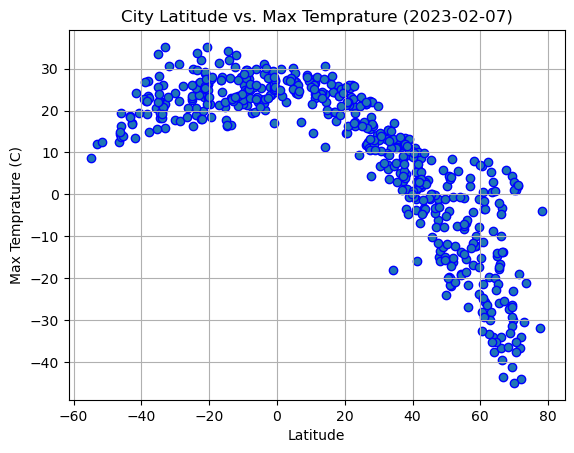

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temprature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

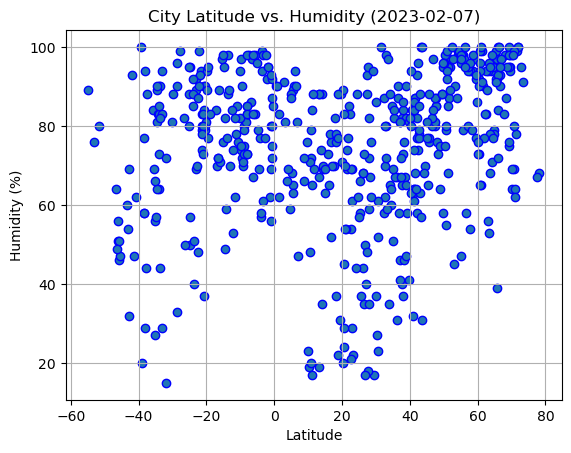

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

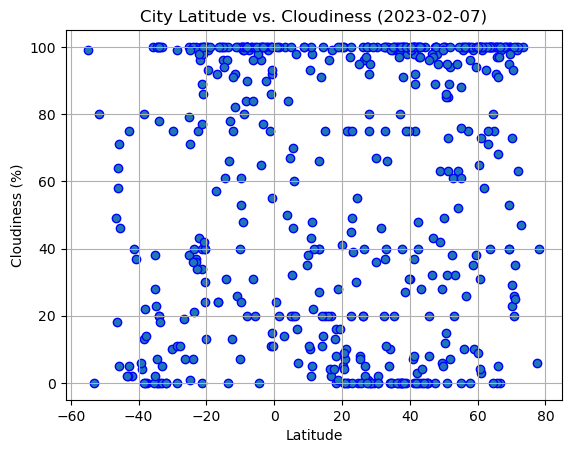

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

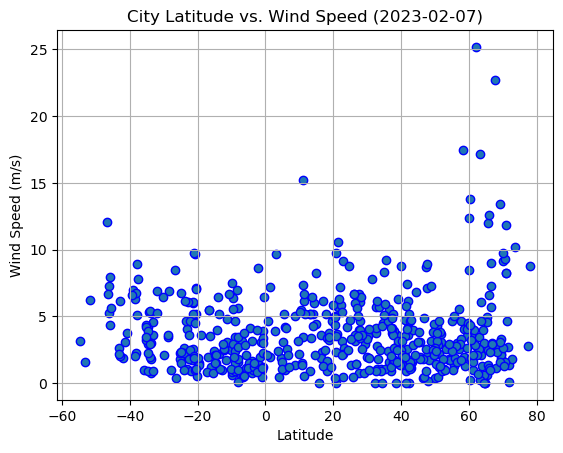

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(axis_x, axis_y):
    d_slope, d_int, d_r, d_p, d_std_err = linregress(axis_x, axis_y)
    d_fit = d_slope * axis_x + d_int
    d_fit_str = f"y = {d_slope:.2f}x {'-' if d_int < 0 else '+'} {abs(d_int):.2f}"

    return d_fit, d_fit_str, d_r

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,1.79,78,97,1.34,US,1675825380
4,bay roberts,47.5999,-53.2648,-2.70,85,100,7.15,CA,1675825594
7,chitrakonda,18.1167,82.0833,24.04,37,8,0.89,IN,1675825594
8,turukhansk,65.8167,87.9833,-16.71,97,100,2.45,RU,1675825008
9,longyearbyen,78.2186,15.6401,-4.09,68,40,8.75,SJ,1675825595


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,18.25,81,7,2.93,ZA,1675825592
2,batemans bay,-35.7167,150.1833,20.61,84,100,0.94,AU,1675825593
3,lebu,-37.6167,-73.6500,14.88,88,0,7.79,CL,1675825043
5,punta arenas,-53.1500,-70.9167,12.06,76,0,1.54,CL,1675825532
6,coquimbo,-29.9533,-71.3436,17.85,88,75,2.06,CL,1675825361


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8649886587800975


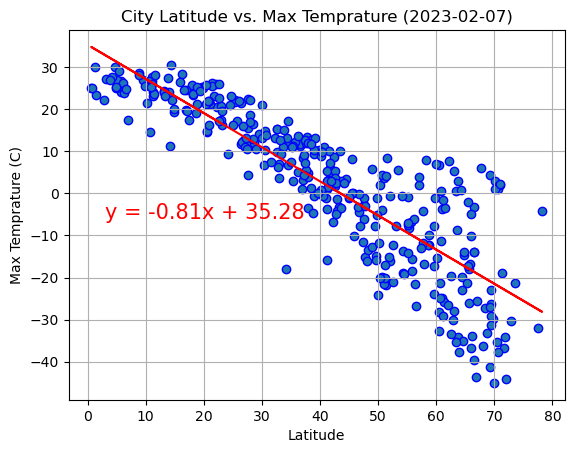

In [16]:
# Linear regression on Northern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temprature ({time.strftime('%Y-%m-%d')})")
plt.plot(northern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(3,-6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.46096508156936006


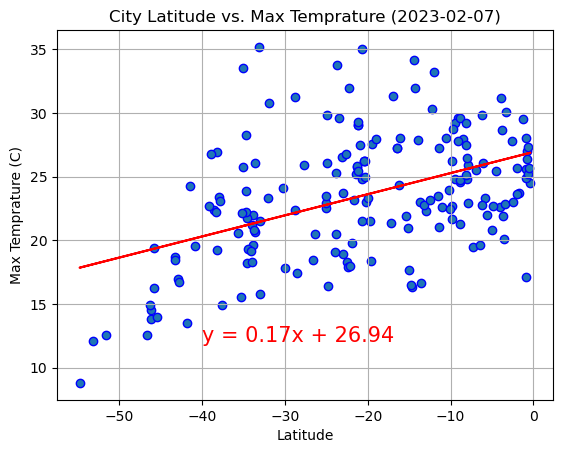

In [17]:
# Linear regression on Southern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temprature ({time.strftime('%Y-%m-%d')})")
plt.plot(southern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(-40,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is a negative corelation between latitude and max-temprature in the northern hemisphere, while there is a positive association observed in southern hemisphere, though it is a weak association.

Further away we go from the equator we observe lower tempratures. This corelation is stronger in norther hemisphere. The r-value much close to -1 indicates that.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4177932445537273


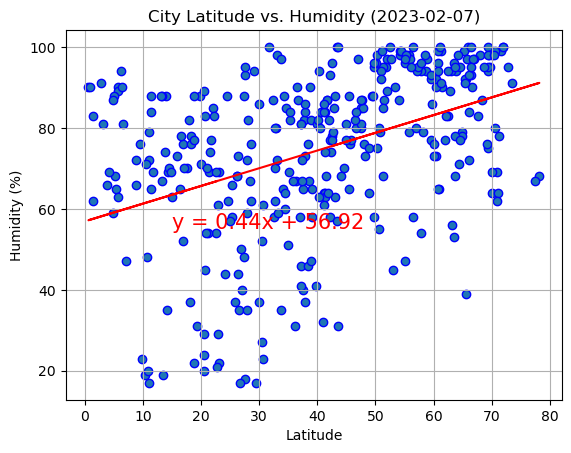

In [18]:
# Northern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.plot(northern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(15,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.3470762956440381


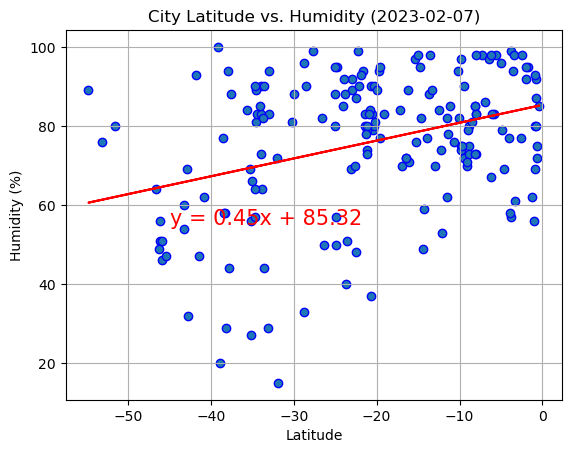

In [19]:
# Southern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.plot(southern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(-45, 55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Eventhough we observe a positive corelation in both hemispheres between latitude and humidity, the association is really week. We may be able to find better association if we compare humidity to relative distance of places from large water bodies.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26640921763792025


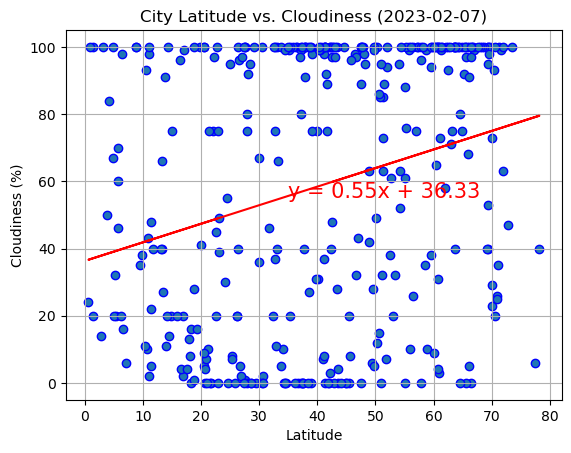

In [20]:
# Northern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. cloudiness
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.plot(northern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(35,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.4388149382705294


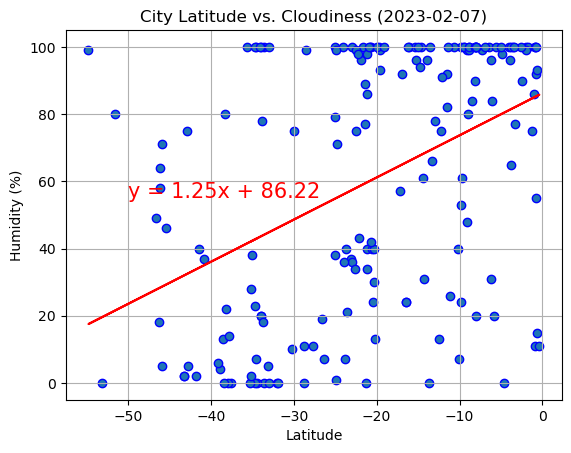

In [21]:
# Southern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. cloudiness
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.plot(southern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(-50, 55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**
There is none or very weak corelation between latitude and cloudiness in northern hemisphere. The case in southern hemisphere is slightly better, but still weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06077401308023956


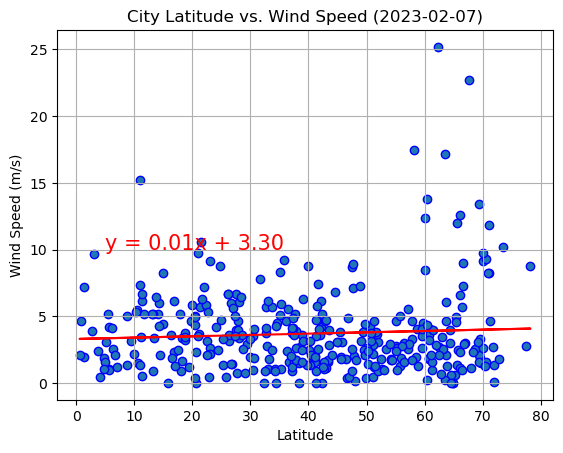

In [22]:
# Northern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. wind speed
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.plot(northern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(5, 10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: -0.3266757160280674


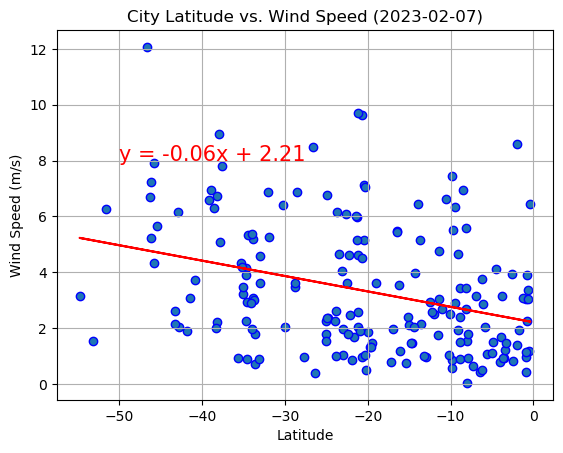

In [23]:
# Southern Hemisphere
d_fit, d_fit_str, d_r = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print("The r-value is: " + str(d_r))

# Build scatter plot for latitude vs. wind speed
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="b")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.plot(southern_hemi_df["Lat"], d_fit, "-", color="r")
plt.annotate(d_fit_str,(-50, 8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is none or very weak corelation between latitude and wind speed in northern hemisphere. The case in southern hemisphere is slightly better, but still weak.